In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
def reorder(x):
    col = x.columns.tolist()
    col = col[1:] + [col[0]]
    reorder_data = x[col]
    return reorder_data

In [3]:
path = "../daimonds_HW1_train.csv"
data = pd.read_csv(path).drop(["Unnamed: 0"],axis=1)
data = reorder(data)
data

,carat,x,y,z,price
0,-0.143474,0.168226,0.126436,-0.111555,3002.0
1,0.618050,0.828666,0.841599,0.680407,5845.0
2,0.554590,0.748342,0.658447,0.680407,2968.0
3,-1.010766,-1.152654,-1.112018,-1.172217,800.0
4,-0.841539,-0.920607,-0.867816,-0.861090,579.0
...,...,...,...,...,...
31336,1.168040,1.194585,1.207902,1.104672,5546.0
31337,-0.206935,-0.001347,-0.030551,0.044009,2751.0
31338,-0.503083,-0.394041,-0.370690,-0.450967,1723.0
31339,-0.122321,0.007578,0.021778,0.100578,2906.0


In [4]:
#隨即取出1/10資料
data_random_select_3000 = data.sample(n=3000)
data_random_select_3000=data_random_select_3000.set_index(pd.Index([i for i in range(3000)]))

## Using SGDRegressor

In [5]:
from sklearn.linear_model import SGDRegressor

In [6]:
reg = SGDRegressor(max_iter=1000, tol=1e-3)
train = np.array(data)
train = shuffle(train)
X, y = train[:, 0:4], train[:, 4]
reg.fit(X, y)

SGDRegressor()

In [7]:
y_train_pred=reg.predict(X)
y_train_pred

array([1992.08788164, 2982.65940433, 4482.24230618, ..., 5375.44769832,
       1044.21950797, 5358.36507869])

In [8]:
path = "../daimonds_HW1_test.csv"
test_data = pd.read_csv(path).drop(["Unnamed: 0"],axis=1)
test = reorder(test_data)
test = shuffle(test)
test_select_1000=np.array(test.sample(1000))
X_test, y_test = test_select_1000[:, 0:4], test_select_1000[:, 4]

In [9]:
y_test_pred=reg.predict(X_test)
y_test_pred

array([  962.73765223,  1006.82922523,   435.05199345,   516.44826245,
        1217.94073215,   462.40998102,  4905.99276781,   484.45598925,
        3073.44333716,  2092.64690598,   283.93049099,  6145.10636038,
        1586.63151557,  2982.64627323,  2946.92732399,  9280.70329239,
        7166.44021813,   238.04213526,  1621.85651934,  1924.08017512,
        9393.86233641,  6353.34774552,  3015.04010503,  1820.83566413,
        5352.24953871, 13423.93634796,  8311.30131818,  3040.97660626,
         388.13604864,  1837.78606012,  6118.33367962,  3208.85162541,
        8478.63042381,  7189.26308135,  2203.78469537,   413.11194667,
        6475.10402382,  5202.53594801,  6859.47587179,   562.28509361,
        5421.0025069 ,  3482.78975277,  9221.91207623,  1671.73452936,
        2150.8066219 ,  1862.83397032,  3153.41767636,  5481.43099439,
         411.25539594,  5782.53023001,  9185.06104547, 13532.59288651,
         652.21971582,  1729.40665648,  2060.0222456 ,   487.01058265,
      

In [57]:
score = reg.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

from sklearn.metrics import mean_absolute_percentage_error
print("MAPE_train:",mean_absolute_percentage_error(y, y_train_pred))
print("MAPE_test:",mean_absolute_percentage_error(y_test, y_test_pred))

from sklearn.metrics import mean_squared_error
print("MSE_train:",mean_squared_error(y, y_train_pred))
print("MSE:_test:",mean_squared_error(y_test, y_test_pred))

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE_train:",rmse(y, y_train_pred))
print("RMSE_test:",rmse(y_test, y_test_pred))


def nrmse(y_true, y_pred):
    std=y_true.std()
    return (mean_squared_error(y_true, y_pred))/std
print("NRMSE_train:",nrmse(y, y_train_pred))
print("NRMSE_test:",nrmse(y_test, y_test_pred))

Score:  0.8532065830475698
Accuracy: 85.32065830475698%
MAPE_train: 0.2678162886142492
MAPE_test: 0.26919430907743835
MSE_train: 2361970.300171094
MSE:_test: 2092828.4018250878
RMSE_train: 1536.870293867083
RMSE_test: 1446.6611219719316
NRMSE_train: 592.1305628594714
NRMSE_test: 554.2683756078803


In [52]:
from sklearn.decomposition import PCA
def pca(n__components,X_dataset):
    pca = PCA(n__components)
    pca.fit(X_dataset)
    X_pca = pca.transform(X_dataset)
    #transform means get the x values
    return X_pca
X_pca = pca(1,X)
X_test_pca = pca(1,X_test)

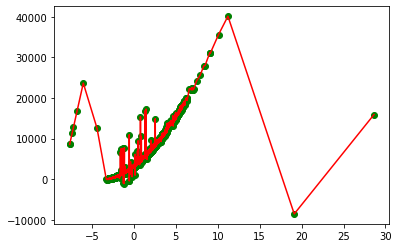

In [53]:
def liner_plot(X,y_pred):
    X_pca = np.squeeze(X)
    #squeeze means 从数组的形状中删除单维度条目，即把shape中为1的维度去掉
    idx = np.argsort(X_pca)
    plt.plot(X_pca[idx], y_pred[idx], "o", color='green')
    plt.plot(X_pca[idx], y_pred[idx], color='red')
    return
plot_train=liner_plot(X_pca,y_train_pred)

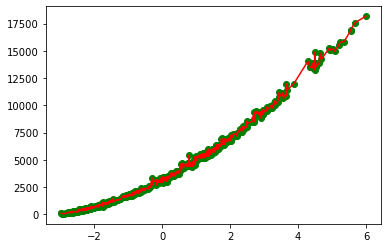

In [55]:
plot_test=liner_plot(X_test_pca,y_test_pred)